# Analysis on Dataset "Dataset-vf"

<strong>The first step in our task to perform multiclass classification on the dataset [Dataset-vf](./Dataset-vf.csv) is preprocessing the dataset, this includes: </strong>
- Dataset analysis and report on important statistics
- Correlation analysis
- Dealing with missing values (if applicable)
- Dealing with imbalanced data (if applicable)
- Feature transformation/engineering
- List of appropriate evaluation measures with justifications


- [Observing the dataset](#Observing-the-dataset)
    - [Important Statisitcs](#Important-Statisitcs)
    - [Nature of the dataset](#Nature-of-the-dataset)
        - [Observing Features](#Observing-Features)
        - [Dealing with Missing Values](#Dealing-with-Missing-Values)
        - [Encoding Categorical Features](#Encoding-Categorical-Features)
        - [Correlation Analysis](#Correlation-Analysis)
        - [Handling Imbalanced Data](#Handling-Imbalanced-Data)
        

## Observing the dataset
<strong>First we need to load the dataset, *report important statistic* on the numerical features and display the type of each feature before we can do further analysis.  </strong>

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [294]:
data = pd.read_csv('Dataset-vf.csv')

### Important Statisitcs

In [295]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,6374.000000,5747.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000
mean,2635.858958,153.239603,17.059617,191.487292,47.864920,1515.537182,215.191246,218.024318,130.301224,1425.017728,0.494167,6.786476
std,394.715236,105.619123,9.008995,177.839135,57.640187,1281.423405,31.643570,23.850334,49.012495,1109.522425,0.291627,573.926918
min,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,0.000000,99.000000,0.000000,30.000000,0.000000,-1000.000000
25%,2282.000000,69.000000,10.000000,42.000000,2.000000,624.000000,200.000000,206.000000,98.000000,663.000000,0.240000,-492.000000
50%,2686.000000,123.000000,16.000000,150.000000,28.000000,1150.000000,223.000000,222.000000,135.000000,1168.000000,0.490000,21.500000
75%,2919.000000,242.000000,24.000000,295.000000,78.000000,1959.000000,238.750000,235.000000,165.000000,1852.000000,0.750000,495.750000
max,3675.000000,360.000000,52.000000,1129.000000,334.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1000.000000


In [296]:
import missingno as msno

<AxesSubplot:>

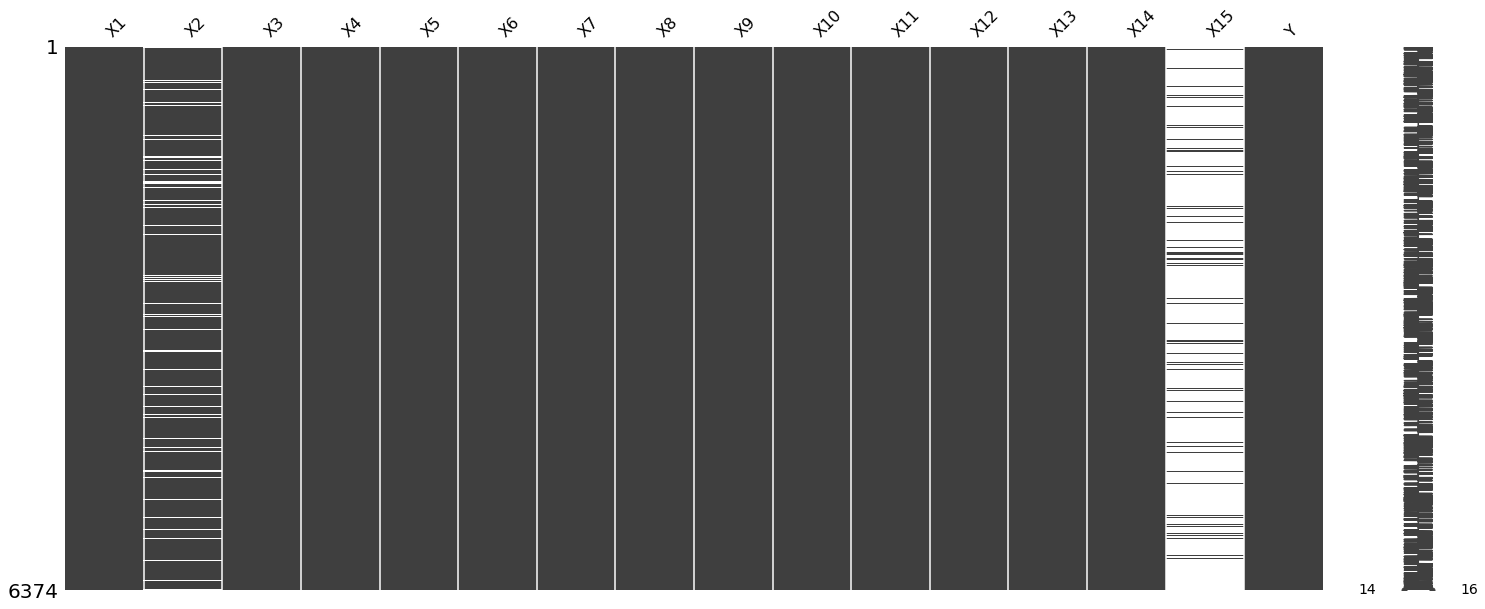

In [297]:
msno.matrix(data)

Visualization of Missing Values: white lines denote the presence of missing value

<hr>

### Nature of the dataset


In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6374 non-null   int64  
 1   X2      5747 non-null   float64
 2   X3      6374 non-null   int64  
 3   X4      6374 non-null   int64  
 4   X5      6374 non-null   int64  
 5   X6      6374 non-null   int64  
 6   X7      6374 non-null   int64  
 7   X8      6374 non-null   int64  
 8   X9      6374 non-null   int64  
 9   X10     6374 non-null   int64  
 10  X11     6374 non-null   float64
 11  X12     6374 non-null   int64  
 12  X13     6374 non-null   object 
 13  X14     6374 non-null   object 
 14  X15     631 non-null    object 
 15  Y       6374 non-null   object 
dtypes: float64(2), int64(10), object(4)
memory usage: 796.9+ KB


In [299]:
data['Y'].unique()

array(['Melon', 'Carrot', 'Orange', 'Apple', 'Berry', 'Mango', 'Peach'],
      dtype=object)

In [300]:
data['X2'].isna().sum()

627

In [301]:
data['X15'].isna().sum()

5743

#### Observing Features

- [Feature Types](#Feature-Types)
- [Target Feature](#Target-Feature)
- [Dealing with Missing Values](#Dealing-with-Missing-Values)
    - [Methods to handle Missing Values](#Methods-to-handle-Missing-Values)
    - [Handling X15 feature](#Handling-X15-feature)
    - [Handling X2 feature](#Handling-X2-feature)
        - [KNN Imputer](#KNN-Imputer)
        - [MICE Imputer](#MICE-Imputer)

##### Feature Types

- there are *15* features in total
- *12* are numerical features
- *3* are categorical


##### Target Feature

- target feature has 7 unique labels which are: ['Melon', 'Carrot', 'Orange', 'Apple', 'Berry', 'Mango', 'Peach']

<strong>Since the features of the dataset are kept anonymous ("X1" - "X15") it is difficult to adequately handle the preprocessing phase since there is no way to identify the nature of the feature.</strong>

<strong>However, looking at the target feature we can see that it is a fruit classification problem. Which will help us in the preprocessing phase. </strong>



#### Dealing with Missing Values

- Feature **"X15"** has *5743* missing values
- Feature **"X2"** has *627* missing values

##### Methods to handle Missing Values

<strong>These methods do not handle missing values the same, so proper justification should be given when a method is implemented</strong>
- Deleting Rows with missing values
- Deleting the feature
- Impute missing values with Mean/Median/Mode
- Replacing with Previous Value – Forward Fill
- Replacing with Next Value – Backward Fill
- [interpolation](https://blog.enterprisedna.co/handling-missing-data-in-python-using-interpolation-method/)
- Imputing using KNN
- [MICE Imputation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/)
 
Resources: 
- https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/
- https://pianalytix.com/how-do-you-handle-missing-values-categorical-data-and-feature-scaling-in-machine-learning/
- https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/
<hr>

##### Handling X15 feature
- has *5743* missing values
- categorical feature
- labels = [R, R1, R2, R3]

<strong>The best method to handle the missing values is to drop this feature.</strong>
<br>
The reasoning is as follows:
- the percentage of missing values is extremely high (at 90%)
- It's a categorical feature so there are not any straightforward statistical method to fill the missing values
- Looking at the unique labels I see that there are four {R, R1, R2, R3}. 
    I would hesitantly conclude that these categories don't make sense (why have R and R1).


In [302]:
data['X15'].isna().sum() / data.shape[0] * 100

90.10040790712269

In [303]:
modified_data = data.drop('X15', axis=1)
modified_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6374 non-null   int64  
 1   X2      5747 non-null   float64
 2   X3      6374 non-null   int64  
 3   X4      6374 non-null   int64  
 4   X5      6374 non-null   int64  
 5   X6      6374 non-null   int64  
 6   X7      6374 non-null   int64  
 7   X8      6374 non-null   int64  
 8   X9      6374 non-null   int64  
 9   X10     6374 non-null   int64  
 10  X11     6374 non-null   float64
 11  X12     6374 non-null   int64  
 12  X13     6374 non-null   object 
 13  X14     6374 non-null   object 
 14  Y       6374 non-null   object 
dtypes: float64(2), int64(10), object(3)
memory usage: 747.1+ KB


<strong>Now that we dropped feature *X15* we can focus on filling the missing values in feature *X2* </strong>

<hr>

##### Handling X2 feature
- has *627* missing values
- numerical feature
- {min, max} = {0, 360}
- median = 123
- mean = 153.23
<br>
<br>
<strong>Methods to consider: </strong>

<br>

- <strong>Deleting rows that have missing values might be a good approach if we have an extremely small percentage 
    (<5%) but since feature "X2" has almost 10% of its values missing, this approach will significantly reduce the dataset (which is already kind of small at 6374 entries) </strong>

- <strong> Deleting the feature be a good approach if we have an extremely large percentage (>50%)   but since feature "X2" has almost 10% of its values missing, this approach will significantly reduce the capability of the model to accurately predict. </strong> 
    
- <strong>We can fill the missing values with the median or mean or mode. However, none of these methods take into account the covariance between features. Furthermore, these methods might skew the results a bit (it is a great approach but today we have more accurate methods) </strong>
    
- <strong> imputing with KNN seems like a good option since it takes into account other features. So it will be an option that we will use   </strong>

- <strong>imputing with Multiple Imputation by Chained Equations (MICE) is also a good option as it also considers other features while imputing. Furthermore, It factors in the correlation between the features</strong>


<br>
    

<p>We will now impute the missing data using KNN and MICE and see which one performs better. our criteria includes:  </p>

- should not modify the max and min values (the feature range: [0,360]. makes us suspect that it has to do with degrees, so we would not want it to modify these values)
- should not significantly change other statisitcs displayed in the original data.

In [304]:
modified_data['X2'].isna().sum() / modified_data.shape[0] * 100

9.836837150925636

In [305]:
modified_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,6374.000000,5747.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000
mean,2635.858958,153.239603,17.059617,191.487292,47.864920,1515.537182,215.191246,218.024318,130.301224,1425.017728,0.494167,6.786476
std,394.715236,105.619123,9.008995,177.839135,57.640187,1281.423405,31.643570,23.850334,49.012495,1109.522425,0.291627,573.926918
min,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,0.000000,99.000000,0.000000,30.000000,0.000000,-1000.000000
25%,2282.000000,69.000000,10.000000,42.000000,2.000000,624.000000,200.000000,206.000000,98.000000,663.000000,0.240000,-492.000000
50%,2686.000000,123.000000,16.000000,150.000000,28.000000,1150.000000,223.000000,222.000000,135.000000,1168.000000,0.490000,21.500000
75%,2919.000000,242.000000,24.000000,295.000000,78.000000,1959.000000,238.750000,235.000000,165.000000,1852.000000,0.750000,495.750000
max,3675.000000,360.000000,52.000000,1129.000000,334.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1000.000000


##### KNN Imputer

In [306]:
from sklearn.impute import KNNImputer

KNN_imputer = KNNImputer(n_neighbors=5, weights='distance')
KNN_imputed_dataset = KNN_imputer.fit_transform(modified_data.drop(['X13', 'X14', 'Y'], axis=1))
KNN_imputed_dataset = pd.DataFrame(KNN_imputed_dataset, columns=modified_data.columns[0:12])
KNN_imputed_dataset.insert(KNN_imputed_dataset.shape[1], "X13",modified_data['X13'], False )
KNN_imputed_dataset.insert(KNN_imputed_dataset.shape[1], "X14",modified_data['X14'], False )

KNN_imputed_dataset.insert(KNN_imputed_dataset.shape[1], "Y",modified_data['Y'], False )
KNN_imputed_dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000
mean,2635.858958,152.626027,17.059617,191.487292,47.864920,1515.537182,215.191246,218.024318,130.301224,1425.017728,0.494167,6.786476
std,394.715236,102.148426,9.008995,177.839135,57.640187,1281.423405,31.643570,23.850334,49.012495,1109.522425,0.291627,573.926918
min,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,0.000000,99.000000,0.000000,30.000000,0.000000,-1000.000000
25%,2282.000000,73.000000,10.000000,42.000000,2.000000,624.000000,200.000000,206.000000,98.000000,663.000000,0.240000,-492.000000
50%,2686.000000,125.000000,16.000000,150.000000,28.000000,1150.000000,223.000000,222.000000,135.000000,1168.000000,0.490000,21.500000
75%,2919.000000,230.000000,24.000000,295.000000,78.000000,1959.000000,238.750000,235.000000,165.000000,1852.000000,0.750000,495.750000
max,3675.000000,360.000000,52.000000,1129.000000,334.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1000.000000


C:\Users\ubi-A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X2'>

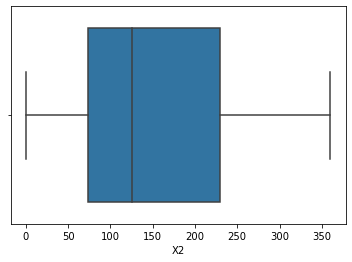

In [307]:
sns.boxplot(KNN_imputed_dataset['X2'])

<hr>

###### MICE Imputer

In [308]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

MICE_imputer = IterativeImputer(imputation_order='random',max_iter=10,random_state=777,n_nearest_features=None)
MICE_imputed_dataset = MICE_imputer.fit_transform(modified_data.drop(['X13', 'X14', 'Y'], axis=1))
MICE_imputed_dataset = pd.DataFrame(MICE_imputed_dataset, columns=modified_data.columns[0:12])
MICE_imputed_dataset.insert(MICE_imputed_dataset.shape[1], "X13",modified_data['X13'], False )
MICE_imputed_dataset.insert(MICE_imputed_dataset.shape[1], "X14",modified_data['X14'], False )

MICE_imputed_dataset.insert(MICE_imputed_dataset.shape[1], "Y",modified_data['Y'], False )
MICE_imputed_dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000
mean,2635.858958,153.189977,17.059617,191.487292,47.864920,1515.537182,215.191246,218.024318,130.301224,1425.017728,0.494167,6.786476
std,394.715236,103.090856,9.008995,177.839135,57.640187,1281.423405,31.643570,23.850334,49.012495,1109.522425,0.291627,573.926918
min,1863.000000,-6.432247,0.000000,0.000000,-134.000000,0.000000,0.000000,99.000000,0.000000,30.000000,0.000000,-1000.000000
25%,2282.000000,73.000000,10.000000,42.000000,2.000000,624.000000,200.000000,206.000000,98.000000,663.000000,0.240000,-492.000000
50%,2686.000000,125.000000,16.000000,150.000000,28.000000,1150.000000,223.000000,222.000000,135.000000,1168.000000,0.490000,21.500000
75%,2919.000000,232.000000,24.000000,295.000000,78.000000,1959.000000,238.750000,235.000000,165.000000,1852.000000,0.750000,495.750000
max,3675.000000,434.467270,52.000000,1129.000000,334.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1000.000000


C:\Users\ubi-A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X2'>

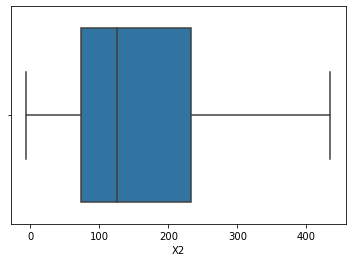

In [309]:
sns.boxplot(MICE_imputed_dataset['X2'])

In [310]:
cleaned_data = KNN_imputed_dataset.copy()
cleaned_data.to_csv('new_dataset-vf.csv', index=False)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6374 non-null   float64
 1   X2      6374 non-null   float64
 2   X3      6374 non-null   float64
 3   X4      6374 non-null   float64
 4   X5      6374 non-null   float64
 5   X6      6374 non-null   float64
 6   X7      6374 non-null   float64
 7   X8      6374 non-null   float64
 8   X9      6374 non-null   float64
 9   X10     6374 non-null   float64
 10  X11     6374 non-null   float64
 11  X12     6374 non-null   float64
 12  X13     6374 non-null   object 
 13  X14     6374 non-null   object 
 14  Y       6374 non-null   object 
dtypes: float64(12), object(3)
memory usage: 747.1+ KB


#### Conclusion 

<strong>Based on our criteria KNN did not change the max and min values of the feature, hence we will impute using KNN </strong>

<hr>


#### Encoding Categorical Features

Categorical Features can be considered as gathered information that is divided into groups. For example, gender is categorical Feature made up of two groups: [Male, Female]

There can be two kinds of categorical data:

- **Nominal**: This type of categorical data consists of the name variable without any numerical values. for example: hair color

- **Ordinal**: This type of categorical data consists of a set of orders or scales. For example: shirt sizes.



##### Encoding Methods:

This type of encoding used depends on when the feature is ordinal or nominal.


- **Ordinal Encoding**: This type of encoding is used when the variables in the data are ordinal, ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels.


- **One-Hot Encoding**: In One-Hot Encoding, each category of any categorical variable gets a new variable. It maps each category with binary numbers (0 or 1). This type of encoding is used when the data is nominal. 


- **Hash Encoder**: Just like One-Hot encoding, the hash encoder converts the category into binary numbers using new data variables but here we can fix the number of new data variables. it may cause loss of information from the data.


- **Binary Encoding**: In the hash encoding, we have seen that using hashing can cause the loss of data and on the other hand we have seen in one hot encoding dimensionality of the data is increasing. The binary encoding is a process where we can perform hash encoding look like encoding without losing the information just like one hot encoding.



Resources: 

- https://contrib.scikit-learn.org/category_encoders/


- https://analyticsindiamag.com/a-complete-guide-to-categorical-data-encoding/


**Categorical Features**: 

- Feature `X13` has the following unique values: [FC11, FC12, FC13, FC14]
- Feature `X14` has the following unqiue values: [' CA49', ' CA50', ' CA26', ' CA32', ' CA38', ' CA42', ' CA37',' CA23', ' CA24', ' CA21', ' CA43', ' CA22', ' CA36', ' CA33',' CA44', ' CA59', ' CA30', ' CA40', ' CA51', ' CA52', ' CA31',' CA58', ' CA25', ' CA39', ' CA53', ' CA60', ' CA46', ' CA54',' CA34', ' CA41', ' CA48', ' CA55']

<strong> feature `X13` has the following properties:</strong>

- labels range from 1 to 4 (all have FC1), you could assume that the it is Ordinal.
- labels can easily be mapped to numerical values (ranges from 1 to 4)


- <strong>Since we DO NOT know the nature of the features we cannot assume an ordinal or some sort of range that can be translated to numerical values. However, since there are numerical values within each category, we will just assume that we can translated it ordinally. BUT we have to be careful as to not any feature translated value skew the results greatly.</strong>

<strong> feature `X14` has the following properties:</strong>

- labels have numerical values (e.g. CA21)
- labels can easily be mapped to numerical values (ranges from 21 to 60)


- <strong>Since we DO NOT know the nature of the features we cannot confidently select an encoding method. However, since there are numerical values within each category, we will just assume that we can translated it ordinally</strong>





In [311]:
cleaned_data['X13'].unique()

array([' FC11', ' FC14', ' FC13', ' FC12'], dtype=object)

In [312]:
cleaned_data['X14'].unique()

array([' CA49', ' CA50', ' CA26', ' CA32', ' CA38', ' CA42', ' CA37',
       ' CA23', ' CA24', ' CA21', ' CA43', ' CA22', ' CA36', ' CA33',
       ' CA44', ' CA59', ' CA30', ' CA40', ' CA51', ' CA52', ' CA31',
       ' CA58', ' CA25', ' CA39', ' CA53', ' CA60', ' CA46', ' CA54',
       ' CA34', ' CA41', ' CA48', ' CA55'], dtype=object)

In [313]:
import category_encoders as ce



X13_mapping = {'col': 'X13', 'mapping': {}}


for category in cleaned_data['X13'].unique():
    X13_mapping['mapping'][category] = int(category.strip()[3:])

encoder= ce.OrdinalEncoder(cols=['X13'],return_df=True, mapping=[X13_mapping])
encoded_data=encoder.fit_transform(cleaned_data)

X14_mapping = {'col': 'X14', 'mapping': {}}
for category in cleaned_data['X14'].unique():
    X14_mapping['mapping'][category] = int(category.strip()[2:])


encoder= ce.OrdinalEncoder(cols=['X14'],return_df=True, mapping=[X14_mapping])
encoded_data=encoder.fit_transform(encoded_data)


In [314]:
encoded_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
0,2709.0,59.0,11.0,120.0,43.0,150.0,228.0,217.0,120.0,2114.0,0.66,269.0,1,49,Melon
1,2802.0,54.0,7.0,0.0,0.0,693.0,224.0,225.0,136.0,162.0,0.35,195.0,1,50,Melon
2,2325.0,28.0,12.0,0.0,0.0,1260.0,215.0,213.0,133.0,162.0,0.89,750.0,4,26,Carrot
3,2837.0,112.0,8.0,272.0,16.0,3649.0,235.0,231.0,128.0,6221.0,0.27,-155.0,1,32,Orange
4,2509.0,59.0,7.0,134.0,10.0,900.0,226.0,226.0,134.0,5184.0,0.93,88.0,1,38,Melon



<hr>


Now with we encoded all the categorical features, we can do correlation analysis


#### Correlation Analysis

Correlation is concerned with The mutual relationship, covariation, or association between two or more variables is called Correlation. It is not concerned with either the changes in x or y individually, but with the measurement of simultaneous variations in both variables.


##### Measures of Correlation

- **Pearson’s rank correlation**: Pearson’s correlation coefficient is a measure of the strength of a linear association between two variables and is denoted by r. Basically, a Pearson’s correlation attempts to draw a line of best fit through two variables' data. The Pearson correlation coefficient, r, indicates how far away all these data points are to this line of best fit.

    **Utility**:
1. Variables can be measured in entirely different units.


2. Pearson’s correlation coefficient `r` is a unitless measure of correlation and doesn’t change in the effect of origin or scale shift measurement.


3. It doesn’t take into consideration whether a variable has been classified as a dependent or independent variable. It treats all variables equally. We might want to find out whether basketball performance is correlated to a person’s height. But if we determine whether a person’s height was determined by their basketball performance (which makes no sense), the result will be the same.


    Properties:
    
        - The range of r is between [-1,1].
        - The computation of r is independent of the change of origin and scale of measurement.
        - r = 1 (perfectly positive correlation), r =-1 (perfectly negative correlation), r = 0 (no correlation)

    Assumptions:
    
        - Both variables should be normally distributed (normally distributed variables have a bell-shaped curve). 
        - A straight line relationship between each of the two variables (Linearity)
        - Data is equally distributed about the regression line. (same variance or homoscedasticity)

- **Spearman rank correlation**: Spearman rank correlation is a non-parametric test that is used to measure the degree of association between two variables.The Spearman rank correlation test does not carry any assumptions about the distribution of the data and is the appropriate correlation analysis when the variables are measured on a scale that is at least ordinal.


    Assumptions
    
        - data must be at least ordinal
        - the scores on one variable must be monotonically related to the other variable.
 
 
    Properties:
    
        - The range of r is between [-1,1].
        - Preserves all properties of r.
        - As this is based on ordinal data, it doesn’t depend on any specific distribution(that is why we called non-parametric measure)




- **Kendall rank correlation**: Kendall rank correlation is a non-parametric test that measures the strength of dependence between two variables.  If we consider two samples, `a` and `b` , where each sample size is `n` , we know that the total number of pairings with `a , b` is `n(n-1)/2`.  


    Assumptions:
    
        - this test can also produce negative values (from -1 to 0). Unlike a linear graph, a negative relationship doesn’t mean much with ranked columns (other than you perhaps switched the columns around), so remove the negative sign when you’re interpreting Tau.
 
 
    Properties:
    
        - 0 is no relationship
        - 1 is a perfect relationship



Resources:

- https://medium.com/analytics-vidhya/correlation-and-machine-learning-fee0ffc5faac

- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/

<AxesSubplot:title={'center':'Pearson'}>

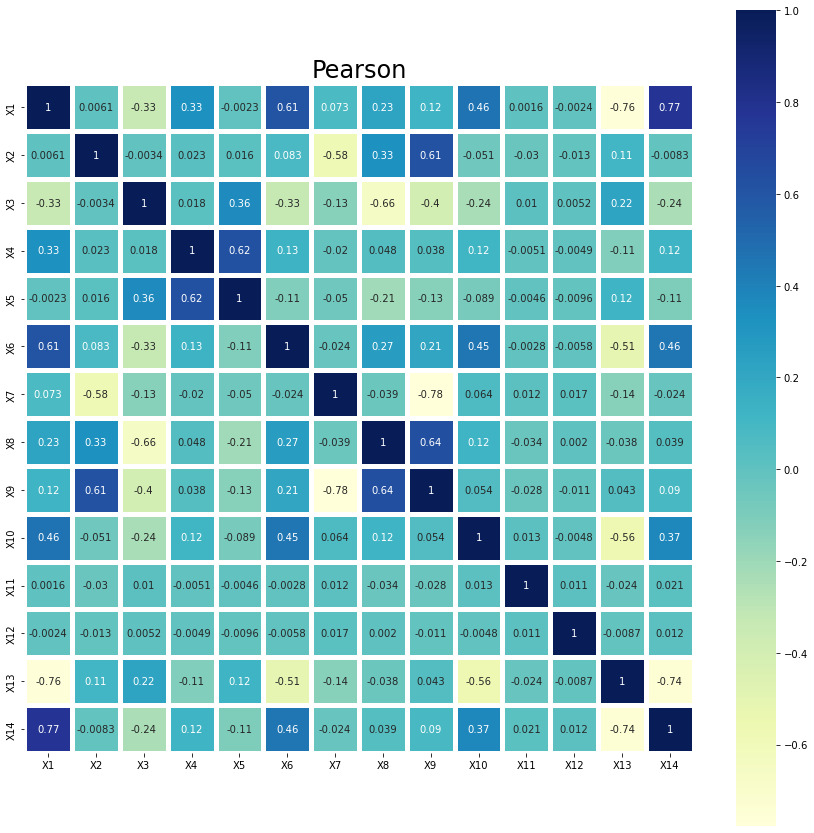

In [315]:
plt.subplots(figsize=(15, 15))
plt.title('Pearson', fontdict={'fontsize': 24})
sns.heatmap(encoded_data.corr(method='pearson'),annot=True, linewidths=5, cmap='YlGnBu', square=True)

<AxesSubplot:title={'center':'Spearman'}>

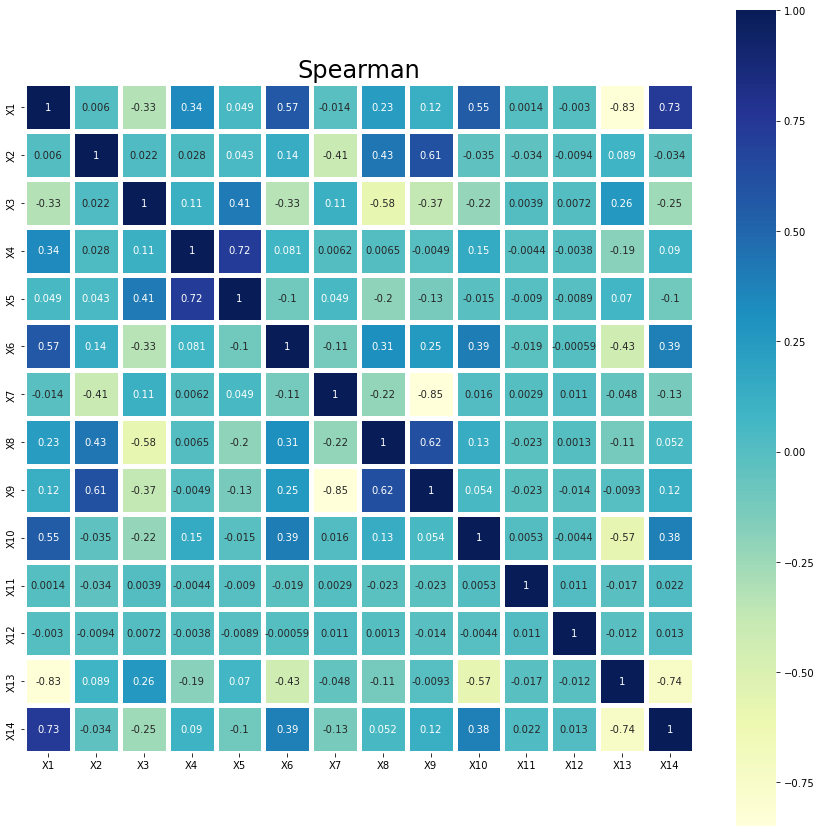

In [316]:
plt.subplots(figsize=(15, 15))
plt.title('Spearman', fontdict={'fontsize': 24})
sns.heatmap(encoded_data.corr(method='spearman'),annot=True, linewidths=5, cmap='YlGnBu', square=True)

<AxesSubplot:title={'center':'Kendall'}>

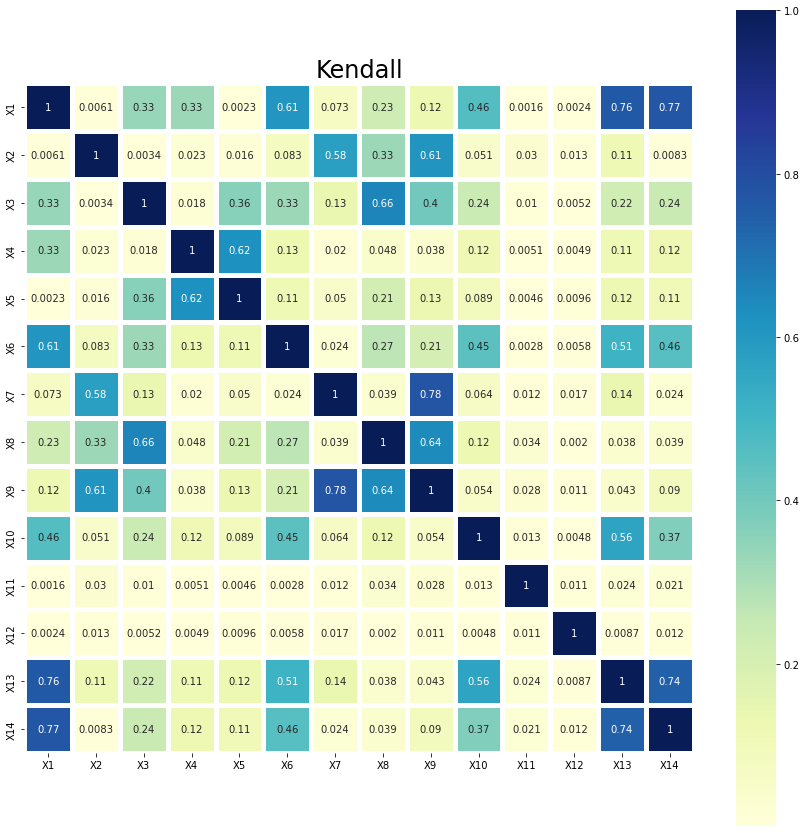

In [322]:
plt.subplots(figsize=(15, 15))
plt.title('Kendall',  fontdict={'fontsize': 24})
sns.heatmap(np.abs(encoded_data.corr(method='kendall')),annot=True, linewidths=5, cmap='YlGnBu', square=True)

<AxesSubplot:title={'center':'Spearman'}>

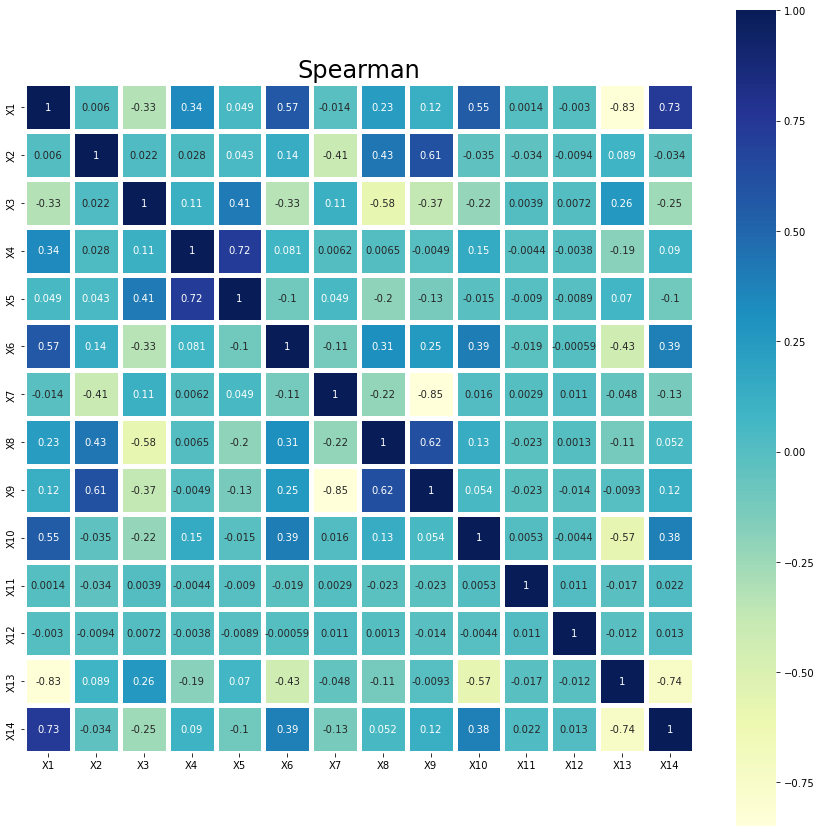

In [324]:
plt.subplots(figsize=(15, 15))
plt.title('Spearman', fontdict={'fontsize': 24})
sns.heatmap(encoded_data.corr(method='spearman'),annot=True, linewidths=5, cmap='YlGnBu', square=True)


##### Conclusion

**NOTE**: for `pearson` and `spearman` we will assume that any correlation with magnitude less than 0.5 is NOT worth considering

**Pearson rank correlation**:


the following are positively correlated features with their respective correlation coefficient:
    - `X1` and `X6` with `0.61`
    - `X1` and `X14` with `0.77`
    - `X2` and `X9` with `0.61`
    - `X4` and `X5` with `0.62`
    - `X8` and `X9` with `0.64`


the following are negatively correlated features with their respective correlation coefficient:
    - `X1` and `X13` with `0.76`
    - `X2` and `X7` with `0.58`
    - `X3` and `X8` with `0.66`
    - `X6` and `X13` with `0.51`
    - `X7` and `X9` with `0.78`
    - `X10` and `X13` with `0.56`
    - `X13` and `X14` with `0.74`


**Spearman rank correlation**:

the following are positively correlated features with their respective correlation coefficient:
    - `X1` and `X6` with `0.57`
    - `X1` and `X10` with `0.55`
    - `X1` and `X14` with `0.73`
    - `X2` and `X9` with `0.61`
    - `X4` and `X5` with `0.72`
    - `X8` and `X9` with `0.62`


the following are negatively correlated features with their respective correlation coefficient:
    - `X1` and `X13` with `0.83`
    - `X3` and `X8` with `0.58`
    - `X7` and `X9` with `0.85`
    - `X10` and `X13` with `0.57`
    - `X13` and `X14` with `0.74`


**Kendall rank correlation**:

here are the ranges we will settle on for Tau correlation coefficient:

- `[0 , 0.10]`: very weak
- `[0.10 , 0.19]`: weak
- `[0.20 to 0.29]`: moderate
- `[0.30, 1]`: strong




<hr>


with correlation analysis done, we can move to handling unbalanced data


#### Handling Imbalanced Data

- `Mango` class only has *250* samples (3.9%)
- `Orange` class only has *100* samples (1.5%)
- `Peach` class only has *308* samples (4.8%)

<strong>we will perform a combination of oversampling and undersampling for the following reasons:</strong>
- ideally the probabilty of a  class should be `1/n` where `n` is the number of classes
- since the dataset is of a decent size we should not only remove samples of majority classes as it would significantly shrink the dataset
- increasing minorty class samples might lead to oversampling. Furthermore, we will be using models like Random Forest that tackles this problem

<strong>Now to pick the techniques of both oversampling and undersampling:</strong>

##### Undersampling

Undersampling techniques eliminate some examples from the training data set belonging to majority classes. 

some techniques to consider:

- **Near Miss Undersampling**: This technique selects the data points based on the distance between majority and minority class examples. It has three versions of itself, and each of these considers the different neighbors from the majority class.


- **Condensed Nearest Neighbor (CNN) Undersampling**: This technique aspires to a subset of a collection of samples that minimizes the model loss. These examples are stores in a store that then consists of examples from the minority class and incorrectly classified examples from the majority class.


- **Tomek Links Undersampling**: This technique is the modified version of CNN in which the redundant examples get selected randomly for deletion from the majority class. These examples are rather internal than near the decision boundary.


- **Edited Nearest Neighbors Undersampling**: This technique uses the nearest neighbors approach and deletes according to the misclassification of the samples. It computes three nearest neighbors for each instance. If the example of a majority class and misclassified by these three neighbors. Then it removes that instance.


we will be using **Near Miss Undersampling** version 3 since it is more accurate since it considers examples of the majority class that are on the decision boundary.

- Version 3 keeps examples from the majority class for each closest record in the minority class.

##### Undersampling

Unlike Undersampling, which focuses on removing the majority class examples, Oversampling focuses on increasing minority class samples.

some techniques to consider:

- **SMOTE**: stands for Synthetic Minority Oversampling Technique. SMOTE selects the nearest examples in the feature space, then draws a line between them, and at a point along the line, it creates a new sample.


- **Borderline-SMOTE**: This SMOTE extension selects the minority class instance that is misclassified with a k-nearest neighbor (KNN) classifier. Since borderline or distant examples are more tend to misclassified.


- **Borderline-SMOTE SVM**: This method selects the misclassified instances of Support Vector Machine (SVM) instead of KNN.


- **Adaptive Synthetic Sampling (ADASYN)**: This approach works according to the density of the minority class instances. Generating new samples is inversely proportional to the density of the minority class samples.


We will be using **Borderline-SMOTE** since we don't want to expand the dataset too much. Furthermore, the choice between KNN and SVM comes down to time.



In [263]:
labels, labels_count = np.unique(data['Y'], return_counts=True)
print(np.asarray((labels,labels_count)))
print(np.asarray((labels,labels_count / np.sum(labels_count))))

[['Apple' 'Berry' 'Carrot' 'Mango' 'Melon' 'Orange' 'Peach']
 [1275 1250 1620 250 1571 100 308]]
[['Apple' 'Berry' 'Carrot' 'Mango' 'Melon' 'Orange' 'Peach']
 [0.20003137747097585 0.19610919359899592 0.2541575149042987
  0.03922183871979919 0.24647003451521807 0.015688735487919672
  0.04832130530279259]]


In [264]:
labels_count

array([1275, 1250, 1620,  250, 1571,  100,  308], dtype=int64)

In [265]:
from imblearn.over_sampling  import BorderlineSMOTE
from collections import Counter
undersampling = BorderlineSMOTE(sampling_strategy={'Mango':(labels_count[3] + 700), 'Orange': ((labels_count[5] + 700)),
                                                   'Peach': (labels_count[6] + 700)}, random_state=777, k_neighbors=5)
X, Y = undersampling.fit_resample(encoded_data.drop('Y', axis=1), encoded_data['Y'])
print(Counter(Y))

Counter({'Carrot': 1620, 'Melon': 1571, 'Apple': 1275, 'Berry': 1250, 'Peach': 1008, 'Mango': 950, 'Orange': 800})


In [266]:
labels, labels_count = np.unique(Y, return_counts=True)
print(np.asarray((labels,labels_count)))
print(np.asarray((labels,labels_count / np.sum(labels_count))))

[['Apple' 'Berry' 'Carrot' 'Mango' 'Melon' 'Orange' 'Peach']
 [1275 1250 1620 950 1571 800 1008]]
[['Apple' 'Berry' 'Carrot' 'Mango' 'Melon' 'Orange' 'Peach']
 [0.1504602312957281 0.14751003068208637 0.19117299976398394
  0.11210762331838565 0.18539060656124617 0.09440641963653529
  0.11895208874203446]]


In [267]:
from imblearn.under_sampling import NearMiss
from collections import Counter
undersampling = NearMiss(sampling_strategy={'Carrot':(labels_count[2] - 350), 
                                                   'Melon': (labels_count[4] - 350)}, n_neighbors=5)
X, Y = undersampling.fit_resample(X, Y)
print(Counter(Y))

Counter({'Apple': 1275, 'Carrot': 1270, 'Berry': 1250, 'Melon': 1221, 'Peach': 1008, 'Mango': 950, 'Orange': 800})


In [268]:
labels, labels_count = np.unique(Y, return_counts=True)
print(np.asarray((labels,labels_count)))
print(np.asarray((labels,labels_count / np.sum(labels_count))))

[['Apple' 'Berry' 'Carrot' 'Mango' 'Melon' 'Orange' 'Peach']
 [1275 1250 1270 950 1221 800 1008]]
[['Apple' 'Berry' 'Carrot' 'Mango' 'Melon' 'Orange' 'Peach']
 [0.16400823257010547 0.16079238487265243 0.16336506303061488
  0.12220221250321585 0.1570620015436069 0.10290712631849755
  0.12966297916130692]]


In [270]:
X.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
count,7774.000000,7774.000000,7774.000000,7774.000000,7774.000000,7774.000000,7774.000000,7774.000000,7774.000000,7774.000000,7774.000000,7774.000000,7774.000000,7774.000000
mean,2702.316156,156.087010,16.844463,199.954113,47.685839,1812.340432,210.950545,217.320108,135.140156,1845.327520,0.491860,14.567309,2.568948,39.036789
std,404.990994,104.313661,8.641682,169.976831,54.081607,1495.857943,32.351781,23.115089,45.707341,1477.672749,0.278113,568.859992,1.293858,12.154339
min,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,0.000000,99.000000,0.000000,30.000000,0.000000,-1000.000000,1.000000,21.000000
25%,2326.000000,71.948659,10.000000,60.000000,7.000000,726.000000,195.000000,206.000000,106.000000,827.292380,0.260000,-479.594060,1.000000,30.000000
50%,2739.000000,129.000000,16.000000,169.960564,31.524031,1260.000000,219.883254,222.000000,137.429877,1433.189342,0.480000,18.966402,3.000000,38.000000
75%,3047.000000,244.967930,23.000000,297.000000,72.979816,2714.750000,234.000000,233.749850,166.000000,2218.756326,0.730000,508.118805,4.000000,49.000000
max,3675.000000,360.000000,52.000000,1129.000000,334.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1000.000000,4.000000,60.000000


In [272]:
type(Y)

pandas.core.series.Series

In [275]:
balanced_data = X.assign(Y=Y)


In [277]:
balanced_data['']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7774 entries, 0 to 7773
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      7774 non-null   float64
 1   X2      7774 non-null   float64
 2   X3      7774 non-null   float64
 3   X4      7774 non-null   float64
 4   X5      7774 non-null   float64
 5   X6      7774 non-null   float64
 6   X7      7774 non-null   float64
 7   X8      7774 non-null   float64
 8   X9      7774 non-null   float64
 9   X10     7774 non-null   float64
 10  X11     7774 non-null   float64
 11  X12     7774 non-null   float64
 12  X13     7774 non-null   int32  
 13  X14     7774 non-null   int32  
 14  Y       7774 non-null   object 
dtypes: float64(12), int32(2), object(1)
memory usage: 850.4+ KB


In [278]:
balanced_data.groupby('Y').size()

Y
Apple     1275
Berry     1250
Carrot    1270
Mango      950
Melon     1221
Orange     800
Peach     1008
dtype: int64

In [279]:
balanced_data.to_csv('processed_data/balanced_filled_Dataset-vf.csv', index=False)